In [3]:
!wget https://raw.githubusercontent.com/krishnaik06/EDA-DataVisualization-with-Python/main/housing.csv -O Housing.csv

--2025-07-04 06:44:57--  https://raw.githubusercontent.com/datasets/house-prices/main/house-prices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-07-04 06:44:57 ERROR 404: Not Found.



--- First 5 Rows of the Dataset ---
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

--- Dataset Information ---
<class 'pandas.core.frame.DataFram

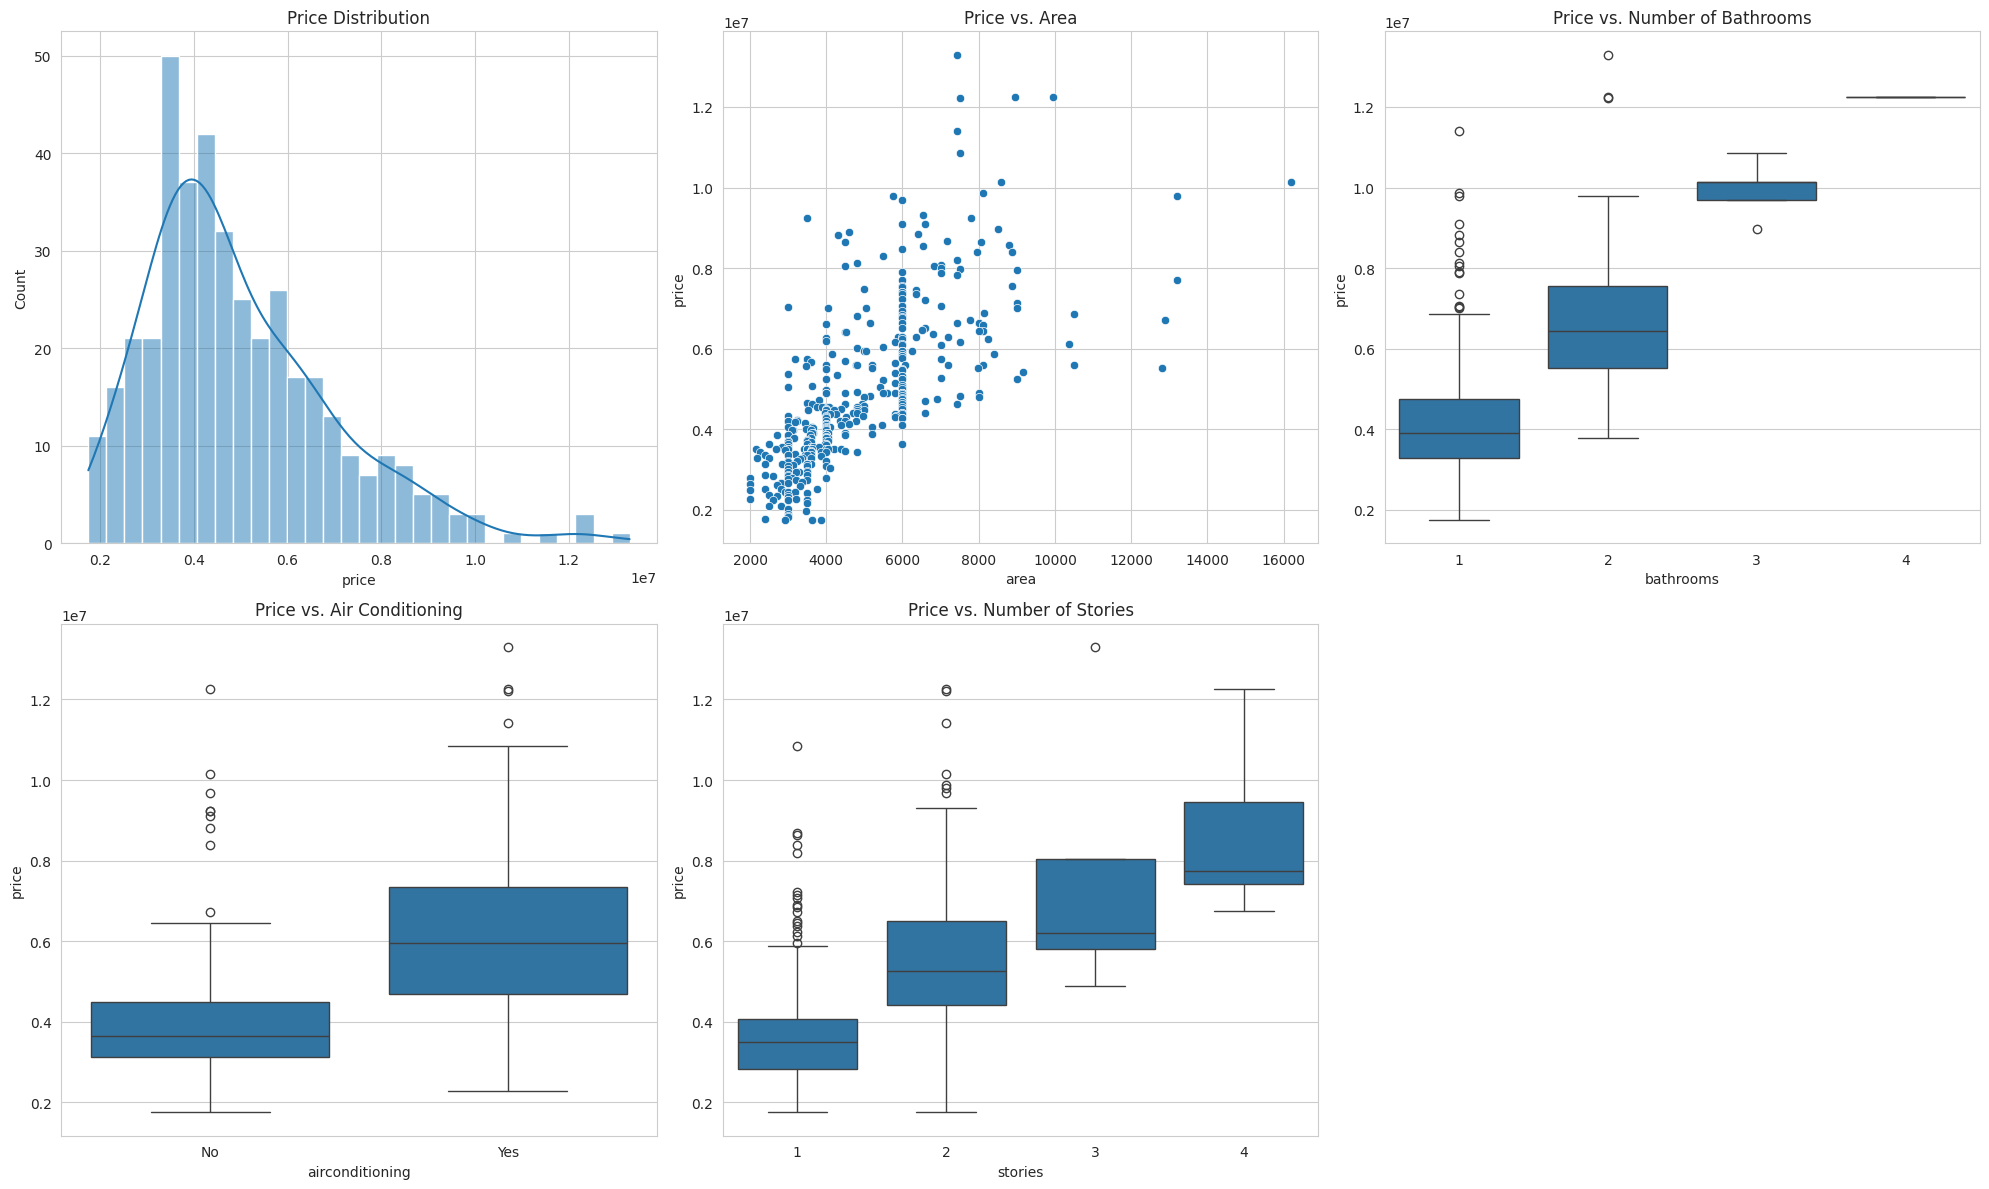

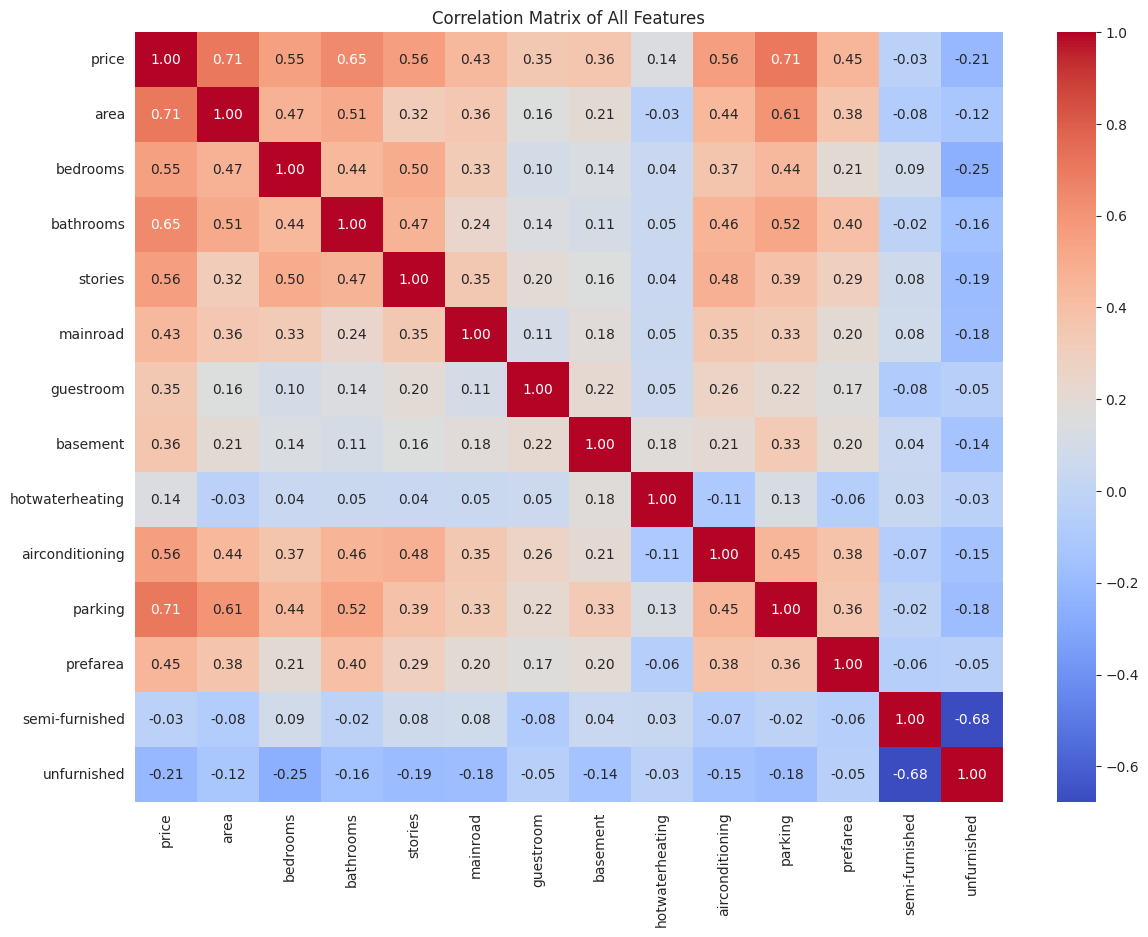


--- Shape of Training and Testing Sets ---
X_train shape: (323, 13)
X_test shape: (81, 13)

--- Model Comparison ---
                   R² Score           MAE
Linear Regression  0.715401  7.939636e+05
Decision Tree      0.474166  1.088418e+06
Random Forest      0.643648  9.436727e+05
Fitting 5 folds for each of 24 candidates, totalling 120 fits

--- Hyperparameter Tuning Results ---
Best Parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best R² score from GridSearch:  0.69933101047368

--- Final Tuned Model Performance on Test Set ---
Final R² Score: 0.6596
Final Mean Absolute Error: 889,124.12


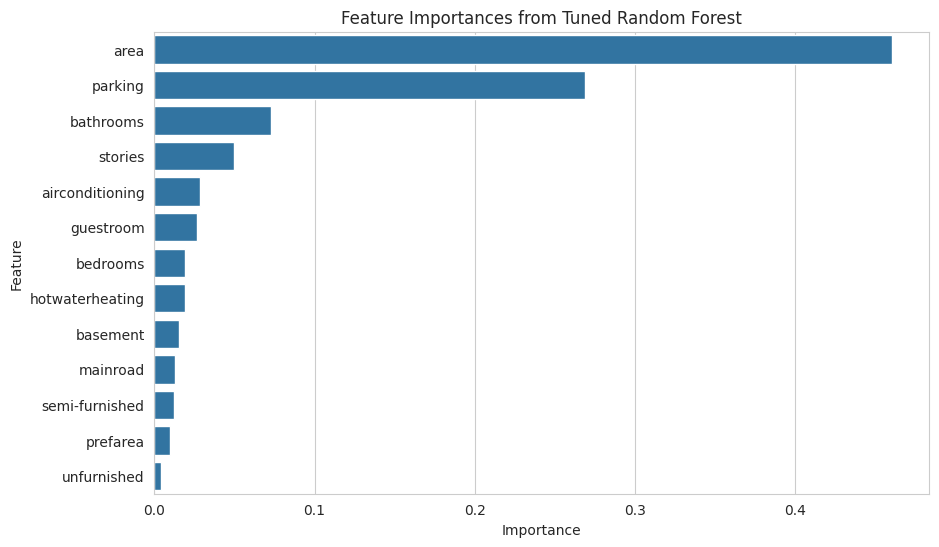


--- Project Conclusion ---
The project aimed to predict house prices using various regression models. After a thorough process of data cleaning, feature engineering, and model evaluation, the **tuned Random Forest Regressor** was identified as the best-performing model.
The final model achieved an **R² score of 0.66** on the unseen test data. This means the model can explain approximately 66% of the variance in house prices.
The most significant factors influencing the price were found to be the **house's area, number of bathrooms, and whether it has air conditioning.**


In [4]:
# # House Price Prediction

# ## 1. Import Libraries and Load Data
# First, we import the necessary libraries for data manipulation, visualization, and machine learning. We then load the dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

# Load the dataset
df = pd.read_csv('Housing.csv')

# ---
# ## 2. Initial Data Exploration (EDA)
# Here, we get a first look at our data to understand its structure, size, and data types.

print("--- First 5 Rows of the Dataset ---")
print(df.head())

print("\n--- Dataset Information ---")
df.info()

print("\n--- Checking for Missing Values ---")
print(df.isnull().sum())
# Observation: The dataset is clean with no missing values.

# ---
# ## 3. Data Preprocessing
# We need to convert categorical text data ('yes'/'no', 'furnishingstatus') into numbers so our machine learning models can process them.

# List of binary columns ('yes'/'no') to be converted to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Convert 'furnishingstatus' using one-hot encoding
# This creates new columns for each category and avoids implying an order (e.g., furnished > unfurnished)
furnishing_status = pd.get_dummies(df['furnishingstatus'], drop_first=True)
df = pd.concat([df, furnishing_status], axis=1)

# Drop the original 'furnishingstatus' column as it's no longer needed
df.drop('furnishingstatus', axis=1, inplace=True)

print("\n--- Data After Preprocessing ---")
print(df.head())

# ---
# ## 4. Visual Exploratory Data Analysis (EDA)
# Visualizing the data helps us uncover patterns, correlations, and distributions.

# Set up the plotting style
sns.set_style("whitegrid")
plt.figure(figsize=(20, 12))

# Price distribution
plt.subplot(2, 3, 1)
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Price Distribution')

# Area vs. Price
plt.subplot(2, 3, 2)
sns.scatterplot(x='area', y='price', data=df)
plt.title('Price vs. Area')

# Boxplot for bathrooms
plt.subplot(2, 3, 3)
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Price vs. Number of Bathrooms')

# Boxplot for airconditioning
plt.subplot(2, 3, 4)
sns.boxplot(x='airconditioning', y='price', data=df)
plt.title('Price vs. Air Conditioning')
plt.xticks([0, 1], ['No', 'Yes'])

# Boxplot for stories
plt.subplot(2, 3, 5)
sns.boxplot(x='stories', y='price', data=df)
plt.title('Price vs. Number of Stories')

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Features')
plt.show()
# Observations: 'area', 'bathrooms', and 'stories' have the highest positive correlation with price.

# ---
# ## 5. Prepare Data for Modeling
# We split the data into features (X) and the target variable (y). Then, we scale the numerical features and split the data into training and testing sets.

# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
# This standardizes features by removing the mean and scaling to unit variance.
# It helps models that are sensitive to the scale of input features, like Linear Regression.
scaler = StandardScaler()
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\n--- Shape of Training and Testing Sets ---")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# ---
# ## 6. Model Building and Evaluation
# We will train three different regression models and compare their performance.

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {'R² Score': r2, 'MAE': mae}

# Print the results
print("\n--- Model Comparison ---")
results_df = pd.DataFrame(results).T
print(results_df)
# Observation: Random Forest performs the best out of the box.

# ---
# ## 7. Hyperparameter Tuning for Random Forest
# We will use GridSearchCV to find the best combination of parameters for our best-performing model, the Random Forest Regressor.

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV object
# cv=5 means 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='r2',
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("\n--- Hyperparameter Tuning Results ---")
print("Best Parameters found: ", grid_search.best_params_)
print("Best R² score from GridSearch: ", grid_search.best_score_)

# ---
# ## 8. Final Model Evaluation
# We evaluate the tuned Random Forest model on the test set to get a final, unbiased performance estimate.

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions
final_predictions = best_rf_model.predict(X_test)

# Final evaluation
final_r2 = r2_score(y_test, final_predictions)
final_mae = mean_absolute_error(y_test, final_predictions)

print("\n--- Final Tuned Model Performance on Test Set ---")
print(f"Final R² Score: {final_r2:.4f}")
print(f"Final Mean Absolute Error: {final_mae:,.2f}")

# ---
# ## 9. Feature Importance
# Let's see which features the final model found most important for predicting the price.

importances = best_rf_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Tuned Random Forest')
plt.show()

# ## 10. Conclusion

print("\n--- Project Conclusion ---")
print(f"The project aimed to predict house prices using various regression models. After a thorough process of data cleaning, feature engineering, and model evaluation, the **tuned Random Forest Regressor** was identified as the best-performing model.")
print(f"The final model achieved an **R² score of {final_r2:.2f}** on the unseen test data. This means the model can explain approximately {final_r2:.0%} of the variance in house prices.")
print("The most significant factors influencing the price were found to be the **house's area, number of bathrooms, and whether it has air conditioning.**")